## 6-5절. 서포트벡터머신

- 서포트벡터머신(SVM ; Support Vector Machine) : 매우 강력하고 선형, 비선형 분류, 회귀, 이상치 탐색에 사용가능한 다목적 머신러닝 모델
- 복잡한 분류문제에 잘 들어맞고 작거나 중간 크기의 데이터셋에 적합
- 스케일에 민감하여 스케일링 필수
- 최대마진분류기(Maximal Margin Classifier)를 일반화하고 단점 극복 및 확장한 것이 SVC(서포트벡터분류기). 이를 더 확장하고 비선형 클래스 경계를 수용하기 위해 SVM이 고안됨
    - 최대마진분류기는 초평면에 의해 데이터를 두 공간으로 나눔
        - 초평면이란? p차원 공간에서 p-1차원의 평평한 부분 공간을 의미
        - 관측치들에서 초평면까지 가장 짧은 거리인 마진이 가장 큰 분리 초평면을 찾음
        - 여기서 양의 초평면과 음의 초평면에 접한 관측값들을 '서포트 벡터'라고 부름 (= 초평면에 가장 가까이에 붙어있는 최전방 데이터)
    - 서포트벡터분류기는 최대마진분류기를 가지면서도 일부 관측치가 마진이나 초평면의 반대쪽에 있는 것을 허용
    - 서포트벡터머신은 클래스가 비선형인 경우 SVC의 개념을 확장하고 커널을 활용한 것임.
        - 커널이란 두 관측치들의 유사성을 수량화 하는 함수임. (파이썬 한권으로 끝내기 203p 참고)

### 1. 분류

- SVM의 목표
    - 클래스 사이에 가장 폭이 넓은 도로를 찾는 것.
        - 도로란 최대 마진(margin) 초평면으로 두 클래스 사이의 공간을 나타냄.
        - 도로의 폭이 넓다 = 마진이 크다.
        - 이 도로의 폭을 최대한 넓게 만들어서 두 클래스를 구분하는 것이 SVM의 목표

 <br>
- 하드마진과 소프트 마진
    - 마진 오류란 샘플이 도로 중간이나 반대편에 있는 것.
    - 하드 마진 : 마진 오류를 하나도 발생하지 않으면서 마진을 크게 함. 
    - 소프트 마진 : 제한적인 오류를 가지면서 가능한 마진을 크게 함. (오분류를 허용하기 때문에 C라는 하이퍼파라미터를 가짐.)
        - 선형으로 구분되지 않는 데이터와 노이즈가 있는 경우 적용가능.
 
 <br>
- 하이퍼파라미터 C : 서포트 벡터 머신(SVM)의 정규화(regularization) 파라미터
    - C의 크기에 따라 오차 허용도가 달라짐 = SVM이 훈련 데이터에 얼마나 엄격하게 적합(fitting)하는지를 조절
    - 오분류에 대한 패널티를 조절하여 과적합과 과소적합 사이에 균형을 찾게 도와줌.
    - C >0 이면 C이하의 관측치들이 초평면 반대쪽에 존재하는 것을 허용함 (소프트마진)
        - C 증가시 모델을 유연하게 만들어 마진 위반에 대한 허용도가 커짐
        - 작아지면 마진 위반에 대한 허용도를 줄임.

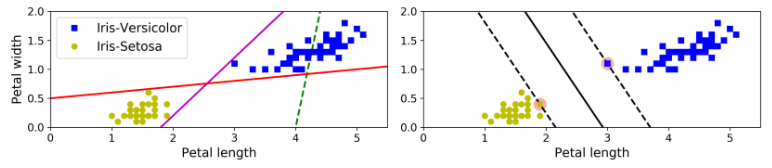

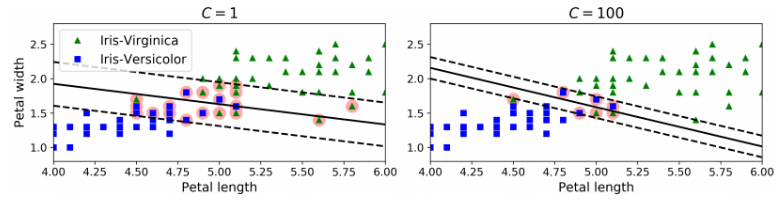

#### 결정함수 $ h = w^Tx+b $ 
- 특성이 n개 있을 때, 결정함수는 n개의 초평면이고 결정경계는 n-1차원의 초평면
- 선형 svm 분류기를 훈련한다는 것은 가능한 마진을 크게하는 w와 b를 찾는 것

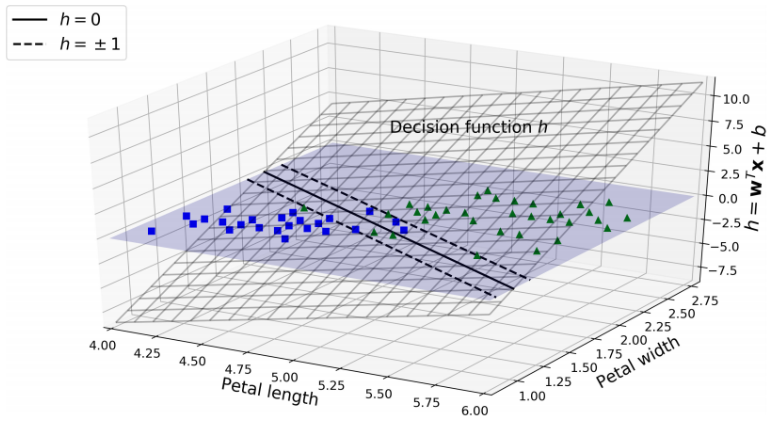

- 하드 마진의 선형 svm 분류기의 목적함수
    - $minimize (\frac{1}{2} * ||w||^2 )$    
    
        - 가중치 벡터(w)의 크기(노름, ||w||)를 최소화 = 결정함수의 기울기를 최소화 = 최대 마진의 폭h이 커짐 (마진을 최대화)
        - 오분류를 허용하지 않아 슬랙 변수 ξ_i가 사용되지 않음.
        
        - Norm 설명 http://taewan.kim/post/norm/
        
 <br>
- 소프트 마진의 선형 svm 분류기의 목적함수
    - $minimize (\frac{1}{2} * ||w||^2 + C * ∑ξ_i)$    
    
        - $minimize (\frac{1}{2} * ||w||^2)$ : 가중치 벡터(w)의 크기(노름, ||w||)를 최소화 = 결정함수의 기울를 최소화 = SVM에서 마진을 최대화하는 것
        - $ C * ∑ξ_i $: 오분류에 대한 패널티는 C와 슬랙 변수(slack variable)의 곱의 합으로 표현
            - 슬랙 변수는 각 데이터 포인트에 대해 정의되며, 해당 데이터 포인트가 제대로 분류되지 않은 경우에만 양수 값
    
            <br>
            - C 값을 크게 설정 -> 오분류에 대한 패널티가 커짐 -> 모델은 최대한 오분류를 줄이려고 노력함 -> 도로(마진)이 좁아지고 분류경계가 복잡해짐 -> 과적합 가능성이 높음 (약한 규제)
            - C 값을 작게 설정 -> 오분류에 대한 패널티가 작아짐 -> 모델은 더 많은 훈련데이터를 오분류하여 마진을 최대화 하려고 함 -> 과소적합 가능성이 높음(강한 규제)

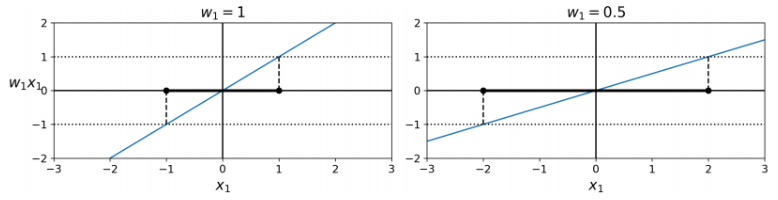

#### 비선형 SVM 분류
- 선형적으로 분류할 수 없는 데이터셋에 대해 특성을 더 추가해줌

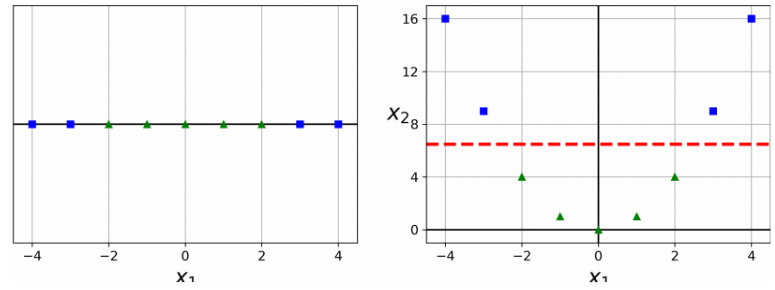

#### 다항식 커널
- 다항식 특성을 추가할 때 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못함.
- 반면, 높은 차수의 다항식은 많은 특성을 추가하므로 모델을 느리게 만듬
- SVM에서의 커널은 실제로 특성을 추가하지 않으면서 다항식 특성을 추가한 것과 같은 결과를 얻을 수 있음.
    - 주어진 데이터를 고차원 특성 공간으로 사상해줌.
    - 실제로 특성을 추가하지 않으므로 엄청난 수의 특성 조합이 생기지 않음.

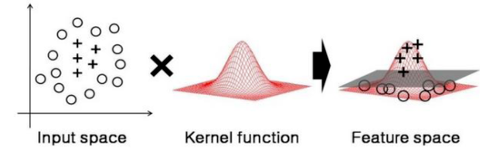

- 커널에는 Polynomial 커널, Sigmoid 커널, 가우시안RBF 커널 등 종류가 많은데, 그 중 가우시안RBF(Radial Basis Function) 커널이 성능이 좋아 자주 사용함.

결정함수(Decision function)와 목적함수(Objective function)는 머신러닝에서 다른 역할을 합니다.

결정함수는 입력 데이터와 함께 모델이 학습한 파라미터를 사용하여 예측 결과를 출력하는 함수입니다. 이 함수는 모델의 출력 값을 기반으로 최종적으로 분류(Classification) 또는 회귀(Regression) 등의 문제를 해결합니다. 결정 함수는 모델의 학습 결과를 통해 새로운 입력 데이터를 예측하는 데 사용됩니다.

반면, 목적함수는 학습 알고리즘이 최적화하려는 함수입니다. 목적함수는 모델의 예측 결과와 실제 결과(레이블) 간의 차이를 측정하며, 이 차이를 최소화하거나 최대화하여 모델을 학습시킵니다. 목적함수는 모델의 성능을 측정하고 모델을 최적화하는 데 사용됩니다.

결정함수와 목적함수는 머신러닝에서 모델의 핵심 요소입니다. 결정 함수는 모델의 예측을 수행하며, 목적함수는 모델의 학습과 최적화를 수행합니


#### (1) scikit-learn의 LinearSVC
- 코드 실습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c=pd.read_csv('/kaggle/input/adp-book-data/classification.csv')
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


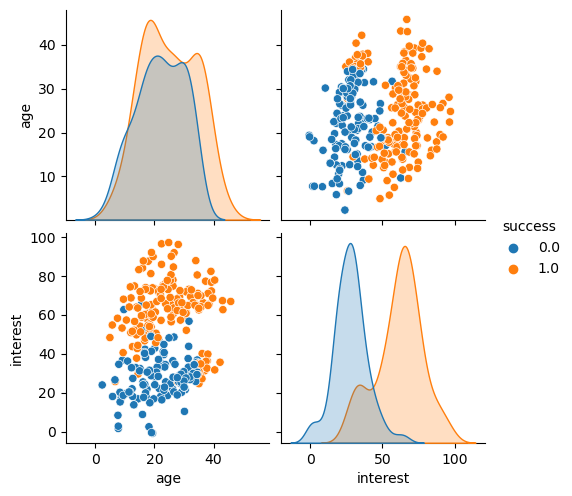

In [2]:
 sns.pairplot(hue='success', data=c)

In [3]:

from sklearn.model_selection import train_test_split

x=c[['age', 'interest']]
y=c['success']

train_x, test_x, train_y, test_y = train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(207, 2) (90, 2) (207,) (90,)


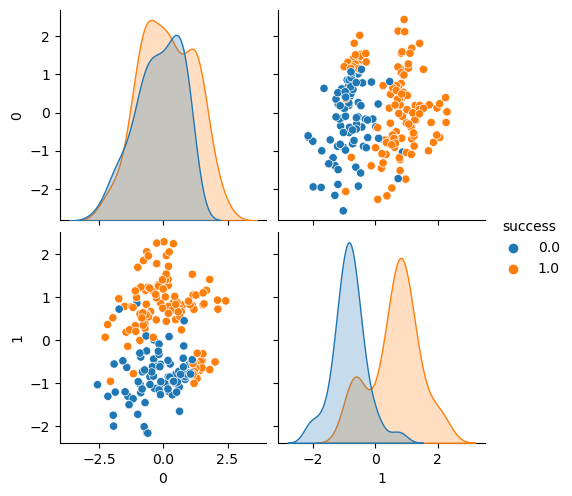

In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
sns.pairplot(data=pd.concat([pd.DataFrame(train_x), train_y.reset_index(drop=True)], axis=1),
             hue='success')

In [5]:
from sklearn.svm import SVC

clf = SVC(C=0.5)
clf.fit(train_x, train_y)

SVC(C=0.5)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_x_scal = scaler.transform(test_x)
pred=clf.predict(test_x_scal)
test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y, pred)
test_rcll=recall_score(test_y, pred)
test_f1=f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[37  2]
 [ 2 49]]


정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


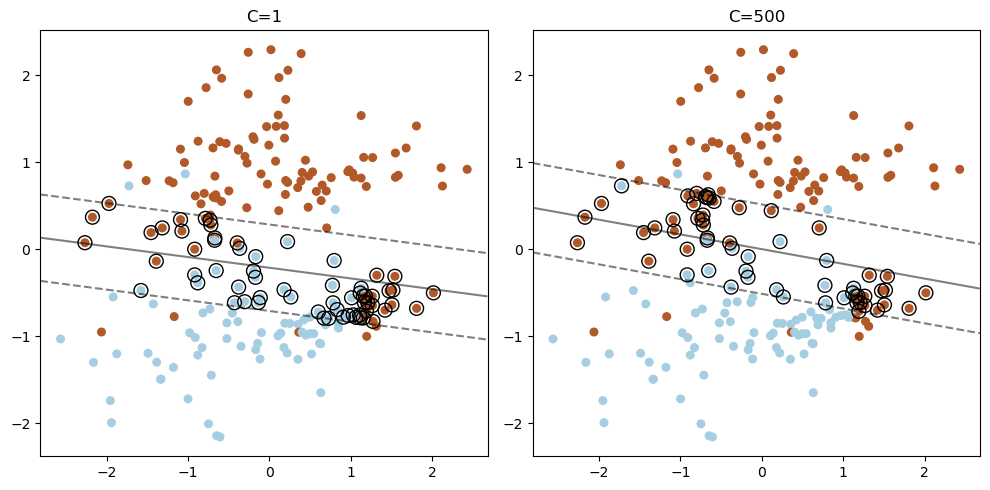

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(train_x, train_y)
    # decision function으로 서포트벡터 얻기
    decision_function = clf.decision_function(train_x)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = train_x[support_vector_indices]

    plt.subplot(1, 2, i +1)
    plt.scatter(train_x[:, 0], train_x[:, 1], c =train_y, s =30, cmap =plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C="+str(C))
plt.tight_layout()
plt.show()

### 2. 회귀

- 분류기에서 목표를 반대로 함
- SVM 분류기는 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 최대
- 서포트벡터회귀(SVR)은 제한된 마진 오류 안에서 도로 안에 가능한 많은 데이터 샘플이 들어가도록 학습

- 도로의 폭은 하이퍼파라미터 $epsilon$ 으로 조절함.
- 입실론이 크면 폭이 넓어지고 값이 작으면 폭이 좁음.
- 마진 안에 훈련샘플이 추가되도 모델 예측에는 영향이 없음.


#### (1) scikit-learn의 LinearSVR
- 코드 실습

In [8]:
import numpy as np

# 샘플데이터 생성하기
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

print(X[0:6], '\n\n', y[0:10])

[[0.29014521]
 [0.51174988]
 [0.51536651]
 [0.67758777]
 [1.06053123]
 [1.09401811]] 

 [0.28609137 0.4897037  0.49285379 0.62691551 0.87261506 0.88847807
 0.92949701 0.93455466 0.98242645 0.99625528]


In [11]:
# 타깃데이터에 노이즈 추가하기
y[::5] += 3 * (0.5 - np.random.rand(8))

print(y[0:10])

[-0.16496364  0.4897037   0.49285379  0.62691551  0.87261506  1.50073123
  0.92949701  0.93455466  0.98242645  0.99625528]


In [12]:
from sklearn.svm import SVR

# 회귀 모델 적합시키기
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [13]:
rbf_pred=svr_rbf.predict(X)
lin_pred=svr_lin.predict(X)
poly_pred=svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results=pd.DataFrame(index =kernel,columns =evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']=round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae']=round(mae,2)

results

,mse,rmse,mae
Random_Forest,0.05,0.22,0.14
Linear,0.2,0.45,0.3
Polynomial,0.04,0.21,0.13


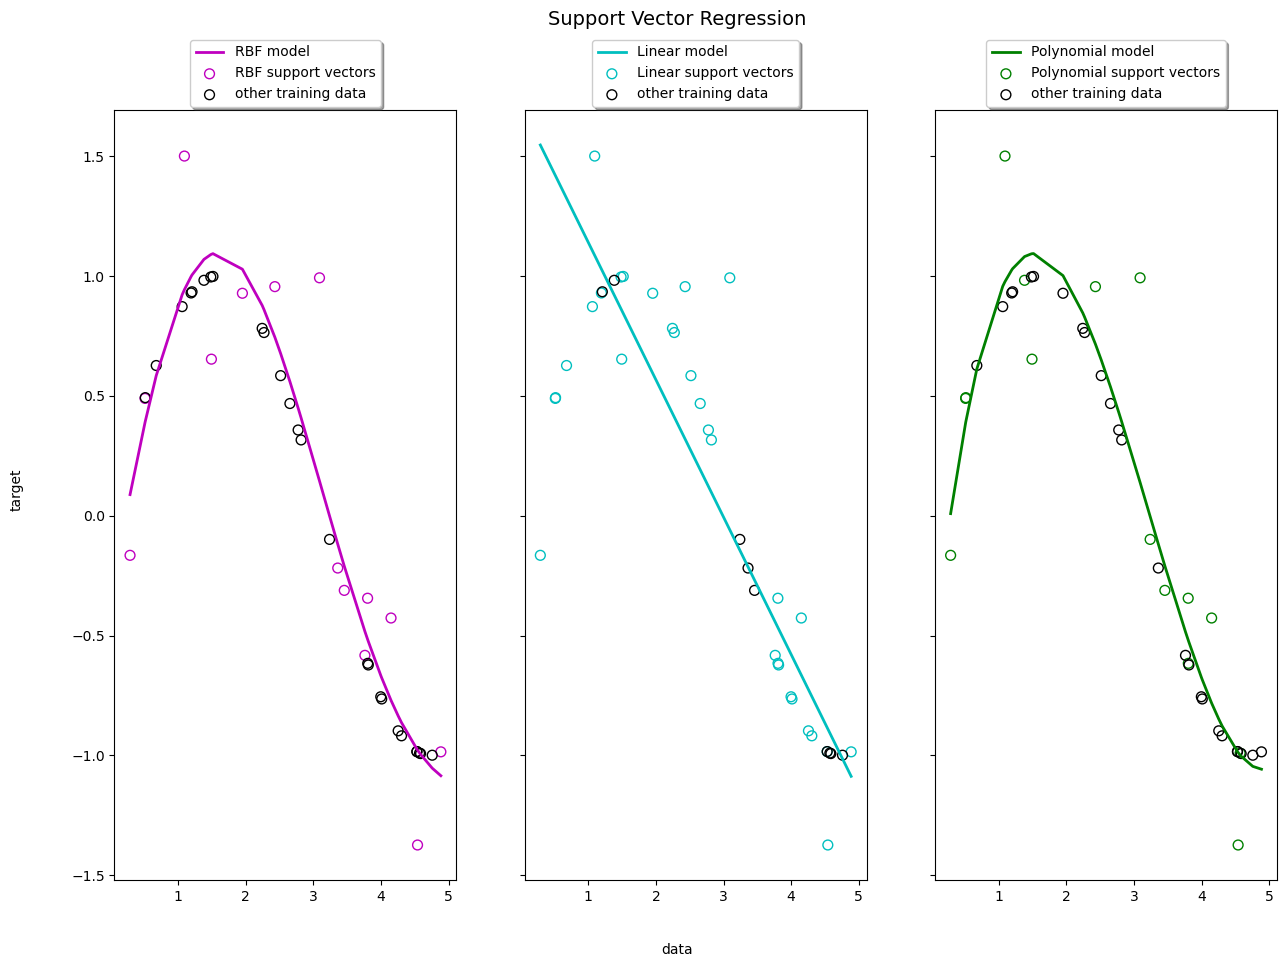

In [14]:
import matplotlib.pyplot as plt
lw =2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()